In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests as requests
import time


In [78]:
data = pd.read_csv(r'C:\Users\pabli\Desktop\Health-Database\data\full_data2.csv')

In [79]:
data.shape

(3580, 2288)

In [80]:
def check_nan(data: pd.DataFrame) -> None:
    
    nan_cols=data.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(data.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show()

In [173]:
nan_cols=data.isna().mean() * 100

In [174]:
nan_cols

Unnamed: 0.3                                                                0.0
Unnamed: 0.2                                                                0.0
Unnamed: 0.1                                                                0.0
Unnamed: 0                                                                  0.0
country                                                                     0.0
                                                                           ... 
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)    0.0
Prevalence of anaemia in pregnant women (aged 15-49) (%)                    0.0
Mean hemoglobin level of non-pregnant women (aged 15-49 years)              0.0
average_age                                                                 0.0
num_nan                                                                     0.0
Length: 210, dtype: float64

In [83]:
data.drop(columns=nan_cols[nan_cols>80].index, inplace=True)

In [91]:
data.shape

(3580, 336)

In [97]:
nan_cols

Unnamed: 0.3                                                                0.000000
Unnamed: 0.2                                                                0.000000
Unnamed: 0.1                                                                0.000000
Unnamed: 0                                                                  0.000000
country                                                                     0.000000
                                                                              ...   
Mean Non-HDL cholesterol, age-standardized                                  6.592179
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)    1.117318
Prevalence of anaemia in pregnant women (aged 15-49) (%)                    1.117318
Mean hemoglobin level of non-pregnant women (aged 15-49 years)              1.117318
average_age                                                                 9.497207
Length: 236, dtype: float64

In [94]:
data.drop(columns=nan_cols[nan_cols>60].index, inplace=True)

In [14]:
data.columns


Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country',
       'country_code', 'year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       ...
       'Number of deaths among children ages 5 to 9 years',
       'Population with primary reliance on clean fuels and technologies for cooking (in millions)',
       'Mortality rate among children ages 10 to 14 years (per 1000 children aged 10)',
       'Proportion of population with primary reliance on clean fuels and technologies for cooking (%)',
       'Mean Non-HDL cholesterol, age-standardized',
       'Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)',
       'Prevalence of anaemia in pregnant women (aged 15-49) (%)',
       'Mean hemoglobin level of non-pregnant women (aged 15-49 years)',
       'Proportion of population with primary reliance on fuels and technologies for cooking, by fuel type (%)',
       'average_age'],
      dtype='object', len

In [87]:
list1= ['Reported number of children receiving antiretroviral therapy','Estimated number of pregnant women living with HIV needing antiretrovirals for preventing mother-to-child transmission',
       'Estimated number of children needing antiretroviral therapy based on WHO methods',
       'Estimated antiretroviral therapy coverage among children','Nursing and midwifery personnel  (number)',
       'Nursing personnel (number)','Pharmacists  (number)','Concentrations of fine particulate matter (PM2.5)',
       'New cases tested for RR-/MDR-TB (%)',
       'Previously treated cases tested for RR-/MDR-TB (%)',
       'Treatment success rate for patients treated for MDR-TB (%)',
       'Cases started on MDR-TB treatment',
       'Total number of notified TB cases',
       'HIV-positive TB patients on ART (antiretroviral therapy) (%)',
       'TB patients with known HIV status (%)',
       'Tested TB patients HIV-positive (%)',
       'New or unknown treatment history cases: Pulmonary, bacteriologically confirmed',
       'New cases: pulmonary smear-negative',
       'New cases: Pulmonary, smear-negative/unknown/not done and other new cases',
       'New cases: Pulmonary, smear-positive',
       'New cases: pulmonary smear unknown/not done',
       'Retreatment cases: other', 'Relapse cases (pre-2013 definition)',
       'Retreatment cases: treatment after default (pulmonary smear and/or culture positive)',
       'Retreatment cases: treatment after failure (pulmonary smear and/or culture positive)',
       'Confirmed cases of RR-/MDR-TB','Congenital Rubella Syndrome - number of reported cases',
       'Neonates protected at birth against neonatal tetanus (PAB) (%)','Low birth weight (in thousands)','Best-practice policy implemented for industrially produced trans-fatty acids (TFA) (Y/N)',
       'Proportion of population with primary reliance on fuels and technologies for cooking, by fuel type (%)',
       'Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD), model-based estimates',
       'Stunting prevalence among children under 5 years of age (% height-for-age <-2 SD), model-based estimates']

In [88]:
list1 = set(list1)

In [89]:
list1 = list(list1)

In [90]:
data.drop(columns=list1, inplace=True)

In [ ]:
len(list1)

In [112]:
data.columns[:50]

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country',
       'country_code', 'year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'population',
       'per_capita-Meningitis',
       'per_capi

In [98]:
list2 = ['Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)','Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)','Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%)','Mean BMI (kg/m&#xb2;) (crude estimate)',
       'Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the median (crude estimate) (%)',
       'Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%)',
       'Prevalence of obesity among children and adolescents, BMI > +2 standard deviations above the median (crude estimate) (%)',
        'Raised fasting blood glucose (>= 7.0 mmol/L) (crude estimate)',
       'Treatment success rate: previously treated TB cases',
        'Previously treated  cases, excluding relapse',
        'BCG immunization coverage among 1-year-olds (%)',]

In [99]:
data.drop(columns=list2, inplace=True)

In [102]:
list3 = ['External health expenditure (EXT) per capita in US$',
        'External health expenditure (EXT) as percentage of current health expenditure (CHE) (%)',
        'Reported number of people receiving antiretroviral therapy',
        'Number of new HIV infections','Dentists (number)','Smear-positive tuberculosis treatment-success rate (%)',
         'Distribution of causes of death among children aged < 5 years (%)',
         'Number of maternal deaths','Mean fasting blood glucose (mmol/l) (crude estimate)','Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths',
        'Number of deaths attributed to non-communicable diseases, by type of disease and sex',
        'Treatment success rate: new TB cases',
        'Incidence of tuberculosis (per 100 000 population) (HIV-positive cases)',
        'Number of incident tuberculosis cases,  (HIV-positive cases)','Mean HDL cholesterol, crude',
         'Mean Non-HDL cholesterol, crude',
        ]

In [103]:
data.drop(columns=list3, inplace=True)

In [104]:
data.shape


(3580, 209)

'N nan cols: 113'

Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)                                      20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)                           20.903955
Mean systolic blood pressure (crude estimate)                                                     52.824859
Mean systolic blood pressure (age-standardized estimate)                                          20.903955
Current health expenditure (CHE) per capita in PPP int$                                            1.864407
                                                                                                    ...    
Population with primary reliance on clean fuels and technologies for cooking (in millions)         1.694915
Estimated malaria mortality rate (per 100 000 population)                                         46.553672
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)     1.694915
Mean Non-HDL cholesterol, ag

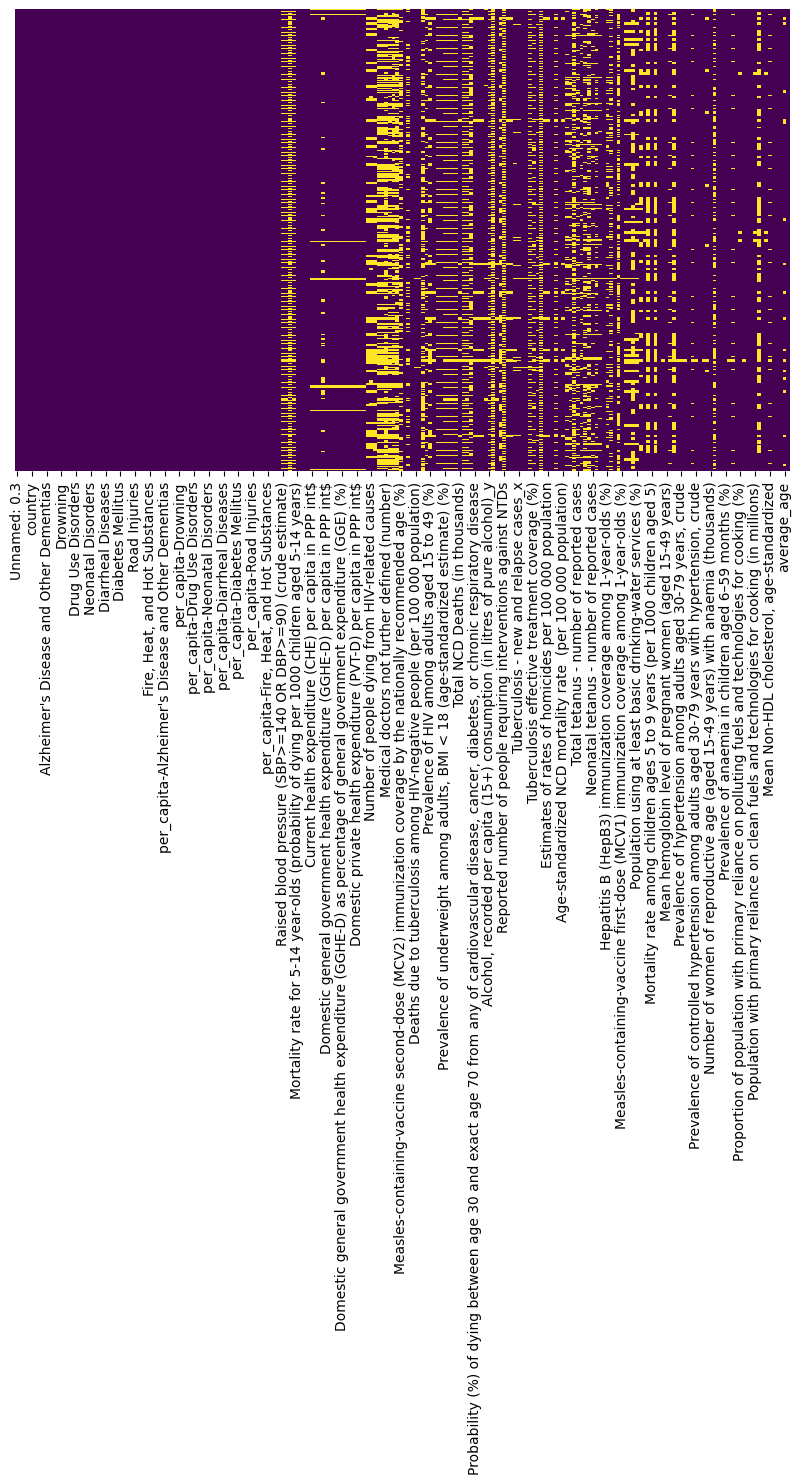

In [111]:
check_nan(data)

In [107]:
data['num_nan']=[sum([pd.isna(e) for e in fila]) for fila in data.itertuples()]

In [108]:
data["num_nan"].value_counts()

15    214
11    209
14    196
13    186
16    186
     ... 
66      1
65      1
74      1
64      1
60      1
Name: num_nan, Length: 76, dtype: int64

In [117]:
data[data.num_nan>40].index

Int64Index([  39,   74,   76,   77,   78,   79,  118,  119,  159,  199,
            ...
            3316, 3317, 3318, 3319, 3419, 3477, 3479, 3537, 3538, 3539],
           dtype='int64', length=157)

In [110]:
data.shape

(3540, 210)

In [46]:
data.loc[2538]

Unnamed: 0.3                                                                       2538
Unnamed: 0.2                                                                       2538
Unnamed: 0.1                                                                       2538
Unnamed: 0                                                                         2538
country                                                                     Puerto Rico
                                                                               ...     
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)            NaN
Prevalence of anaemia in pregnant women (aged 15-49) (%)                            NaN
Mean hemoglobin level of non-pregnant women (aged 15-49 years)                      NaN
average_age                                                                      35.021
num_nan                                                                             121
Name: 2538, Length: 203, dtype: 

In [109]:
data.drop(data[data.num_nan>=116].index, axis=0, inplace=True)

'N nan cols: 113'

Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)                                      20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)                           20.903955
Mean systolic blood pressure (crude estimate)                                                     52.824859
Mean systolic blood pressure (age-standardized estimate)                                          20.903955
Current health expenditure (CHE) per capita in PPP int$                                            1.864407
                                                                                                    ...    
Population with primary reliance on clean fuels and technologies for cooking (in millions)         1.694915
Estimated malaria mortality rate (per 100 000 population)                                         46.553672
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)     1.694915
Mean Non-HDL cholesterol, ag

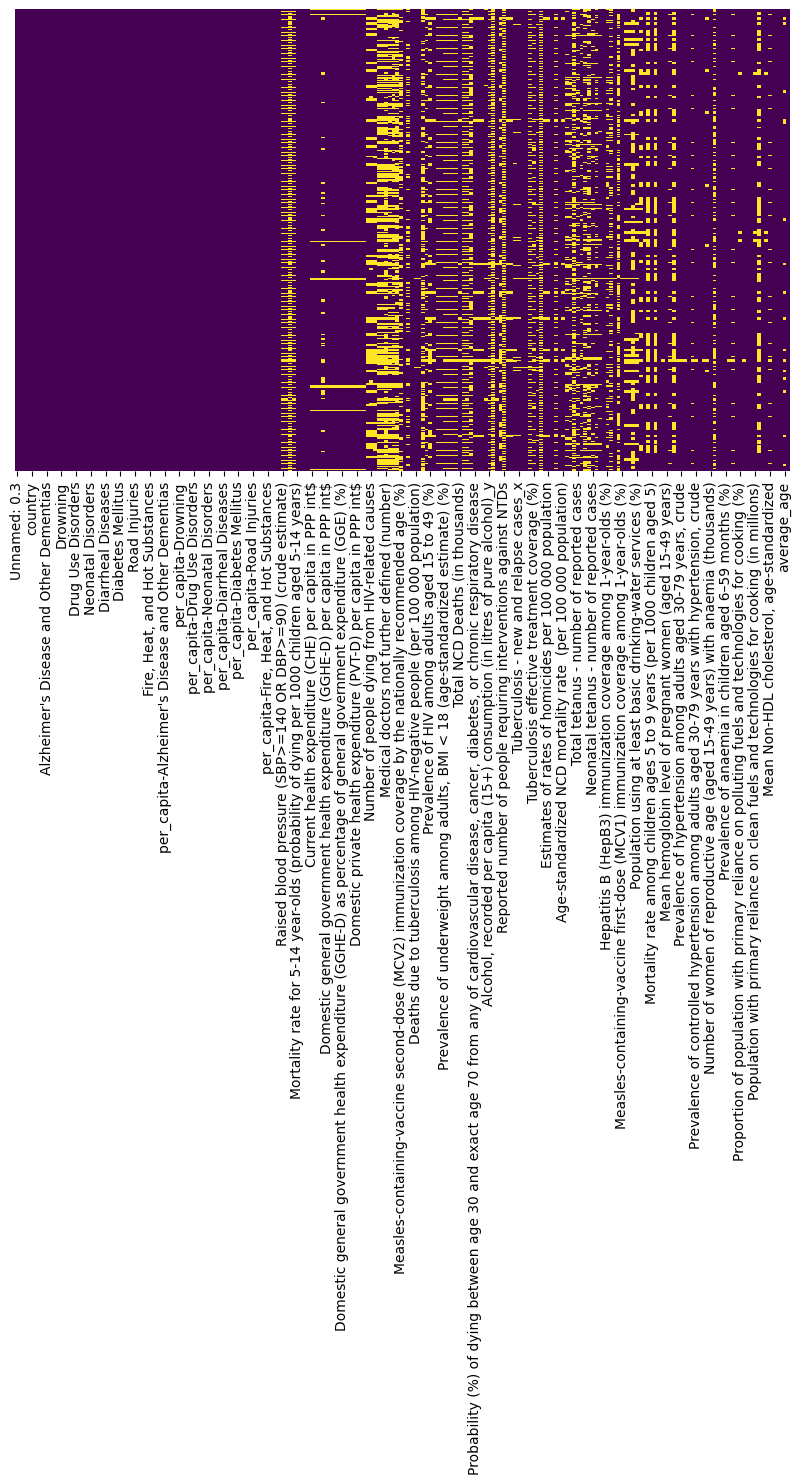

In [118]:
check_nan(data)

In [130]:
nan_cols[nan_cols>1].index

Index(['Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)',
       'Mean systolic blood pressure (crude estimate)',
       'Mean systolic blood pressure (age-standardized estimate)',
       'Current health expenditure (CHE) per capita in PPP int$',
       'Current health expenditure (CHE) per capita in US$',
       'Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)',
       'External health expenditure (EXT) per capita in PPP int$',
       'Domestic general government health expenditure (GGHE-D) per capita in PPP int$',
       'Domestic general government health expenditure (GGHE-D) per capita in US$',
       'Domestic general government health expenditure (GGHE-D) as percentage of current health expenditure (CHE) (%)',
       'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)',
       'Domestic general gov

In [124]:
data["Yellow fever - number of reported cases"].fillna(0.0,inplace=True)

In [125]:
data['Mumps - number of reported cases'].fillna(0.0,inplace=True)

In [132]:
data.shape

(3540, 210)

'N nan cols: 111'

Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)                                      20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)                           20.903955
Mean systolic blood pressure (crude estimate)                                                     52.824859
Mean systolic blood pressure (age-standardized estimate)                                          20.903955
Current health expenditure (CHE) per capita in PPP int$                                            1.864407
                                                                                                    ...    
Population with primary reliance on clean fuels and technologies for cooking (in millions)         1.694915
Estimated malaria mortality rate (per 100 000 population)                                         46.553672
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)     1.694915
Mean Non-HDL cholesterol, ag

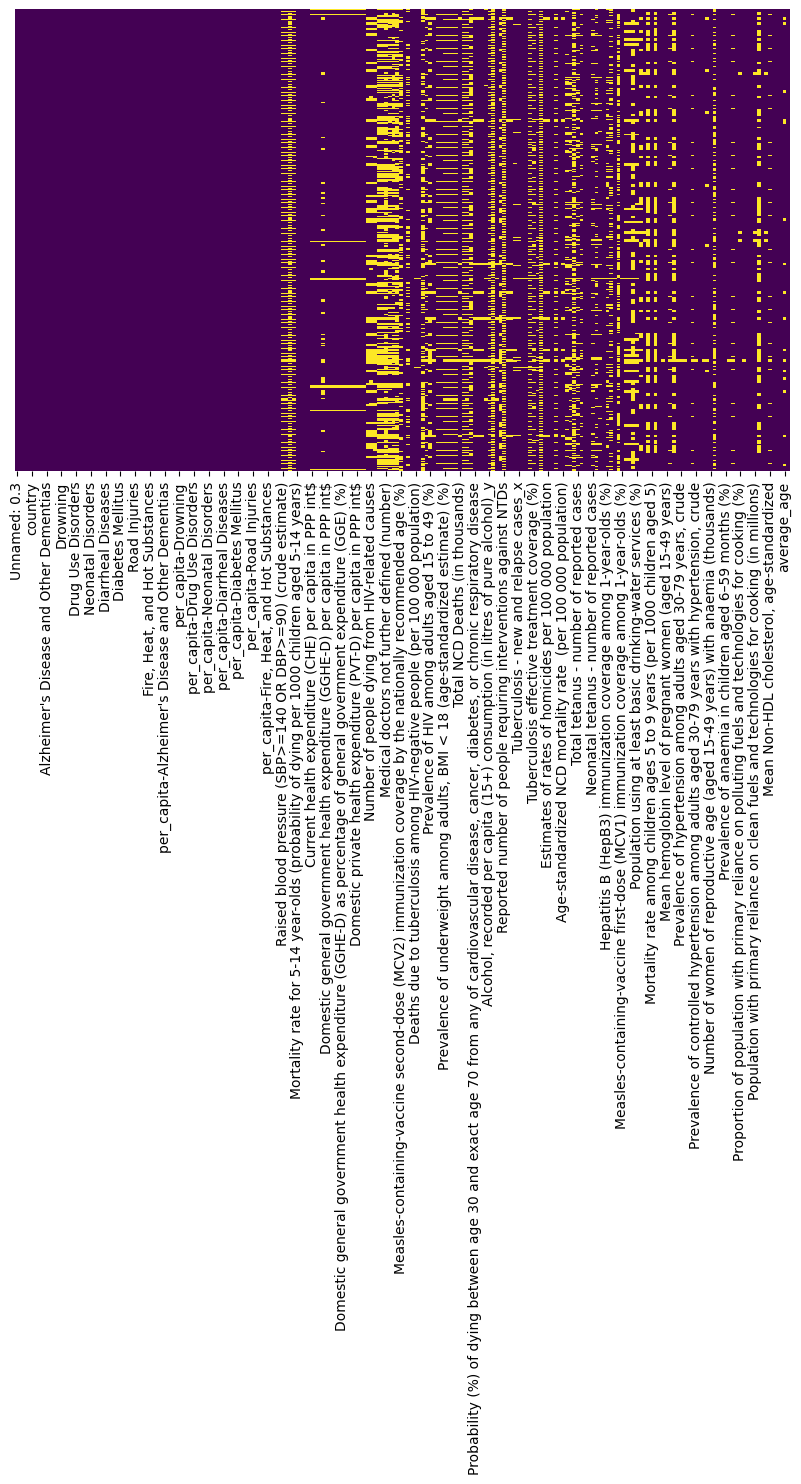

In [131]:
check_nan(data)

In [138]:
data.drop(data[data["average_age"].isna()==True].index,axis=0,inplace=True)

In [151]:
data.shape

(3220, 210)

In [160]:
data.columns[:50] 

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country',
       'country_code', 'year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'population',
       'per_capita-Meningitis',
       'per_capi

In [198]:
nan_cols[nan_cols>40]

Series([], dtype: float64)

In [167]:
df = data.groupby(by="country").mean()["Hospital beds (per 10 000 population)"]

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\2753809216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()["Hospital beds (per 10 000 population)"]


In [168]:
df1 = {}
for i in range(len(df)):
    df1[df.index[i]]= df[i]

In [169]:
to = data[data["Hospital beds (per 10 000 population)"].isna()==True].index

In [170]:
for i in to:
    data["Hospital beds (per 10 000 population)"][i] = df1[data["country"][i]]

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\524007718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hospital beds (per 10 000 population)"][i] = df1[data["country"][i]]


In [171]:
data[data["Hospital beds (per 10 000 population)"].isna()==True].country.value_counts()

Papua New Guinea    20
Tonga               20
Vanuatu             20
Name: country, dtype: int64

In [185]:
def group(column):
    df = data.groupby(by="country").mean()[column]
    df1 = {}
    for i in range(len(df)):
        df1[df.index[i]]= df[i]
    to = data[data[column].isna()==True].index
    for i in to:
        data[column][i] = df1[data["country"][i]]
    return data[data[column].isna()==True].country.value_counts()
    
    

In [186]:
group("Medical doctors (per 10,000)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [192]:
group("Population using safely managed sanitation services (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Afghanistan    20
Norway         20
Saint Lucia    20
Rwanda         20
Romania        20
               ..
Guatemala      20
Grenada        20
Gabon          20
France         20
Zambia         20
Name: country, Length: 77, dtype: int64

In [196]:
data.drop(columns=nan_cols[nan_cols>40].index,inplace=True)

In [229]:
nan_cols=data.isna().mean() * 100

In [201]:
group("Nursing and midwifery personnel (per 10,000)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [204]:
group("Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended age (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Benin                20
Cameroon             20
Chad                 20
Comoros              20
Equatorial Guinea    20
Gabon                20
Guinea               20
Guinea-Bissau        20
Ireland              20
Madagascar           20
Mauritania           20
Somalia              20
Uganda               20
Vanuatu              20
Name: country, dtype: int64

In [231]:
nan_cols[nan_cols>20]

Estimated number of people (all ages) living with HIV                         21.87500
Number of people dying from HIV-related causes                                23.78125
Estimated antiretroviral therapy coverage among people living with HIV (%)    22.78125
Prevalence of HIV among adults aged 15 to 49 (%)                              21.87500
New HIV infections (per 1000 uninfected population)                           27.34375
Number of prevalent tuberculosis cases                                        25.31250
Low birth weight, prevalence (%)                                              21.25000
dtype: float64

In [212]:
group("Hib (Hib3) immunization coverage among 1-year-olds (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


China       20
Russia      20
Thailand    20
Name: country, dtype: int64

In [213]:
group("Low birth weight, prevalence (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Afghanistan                         20
Saint Vincent and the Grenadines    20
Mauritania                          20
Niger                               20
Nigeria                             20
Pakistan                            20
Papua New Guinea                    20
Saint Lucia                         20
Samoa                               20
Libya                               20
Saudi Arabia                        20
Solomon Islands                     20
Somalia                             20
Sudan                               20
Syria                               20
Tonga                               20
Mali                                20
Liberia                             20
Barbados                            20
Eritrea                             20
Cape Verde                          20
Chad                                20
Cyprus                              20
Djibouti                            20
Egypt                               20
Equatorial Guinea        

In [214]:
group("Adolescent birth rate (per 1000 women aged 15-19 years)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [217]:
group("Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Sudan    20
Name: country, dtype: int64

In [223]:
group("Mean systolic blood pressure (age-standardized estimate)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]


Series([], Name: country, dtype: int64)

In [222]:
data.drop(data[data["Mean systolic blood pressure (age-standardized estimate)"].isna()==True].index,axis=0,inplace=True)

In [232]:
group("Raised fasting blood glucose (>=7.0 mmol/L) (age-standardized estimate)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]


Series([], Name: country, dtype: int64)

In [233]:
group("Mean fasting blood glucose (mmol/l) (age-standardized estimate)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]


Series([], Name: country, dtype: int64)

In [234]:
data.shape

(3200, 194)

In [236]:
data.drop(columns=nan_cols[nan_cols>20].index,inplace=True)

In [267]:
nan_cols=data.isna().mean() * 100

In [268]:
nan_cols[nan_cols>10]

Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)                                          20.00000
External health expenditure (EXT) per capita in PPP int$                                              12.15625
Tuberculosis effective treatment coverage (%)                                                         17.15625
Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)               15.00000
Diphtheria - number of reported cases                                                                 17.31250
Pertussis - number of reported cases                                                                  16.21875
Total tetanus - number of reported cases                                                              17.06250
Neonatal tetanus - number of reported cases                                                           13.81250
Rubella - number of reported cases                                                                    18.09375
P

In [243]:
group("Mean BMI (kg/m²) (age-standardized estimate)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [245]:
group("Prevalence of overweight among adults, BMI &GreaterEqual; 25 (age-standardized estimate) (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [246]:
group("Prevalence of underweight among adults, BMI < 18 (age-standardized estimate) (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [250]:
group("Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [253]:
group("Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_y")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [257]:
group("Population using at least basic sanitation services (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Australia                           20
Bahrain                             20
Barbados                            20
Brunei                              20
Grenada                             20
Japan                               20
Kuwait                              20
Lebanon                             20
Libya                               20
Qatar                               20
Saint Vincent and the Grenadines    20
Saudi Arabia                        20
Slovenia                            20
Trinidad and Tobago                 20
United Arab Emirates                20
Venezuela                           20
Name: country, dtype: int64

In [261]:
group("Population practising open defecation (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Australia                           20
Bahrain                             20
Barbados                            20
Brunei                              20
Grenada                             20
Japan                               20
Kuwait                              20
Lebanon                             20
Libya                               20
Qatar                               20
Saint Vincent and the Grenadines    20
Saudi Arabia                        20
Slovenia                            20
Trinidad and Tobago                 20
United Arab Emirates                20
Venezuela                           20
Name: country, dtype: int64

In [264]:
group("Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Denmark     20
Finland     20
Hungary     20
Iceland     20
Slovenia    20
Name: country, dtype: int64

In [269]:
data.drop(columns=nan_cols[nan_cols>10].index,inplace=True)

In [270]:
data.shape

(3200, 177)

In [280]:
nan_cols=data.isna().mean() * 100

In [281]:
nan_cols[nan_cols>5]

Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended age (%)     8.75000
Poliomyelitis - number of reported cases                                                                      9.78125
Population using at least basic sanitation services (%)                                                      10.00000
Population practising open defecation (%)                                                                    10.00000
Population using at least basic drinking-water services (%)                                                   9.87500
dtype: float64

In [276]:
group("Maternal mortality ratio (per 100 000 live births)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [277]:
group("Number of deaths")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [278]:
group("Deaths per 1 000 live births")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [282]:
data.drop(columns=nan_cols[nan_cols>5].index,inplace=True)

'N nan cols: 23'

Deaths due to tuberculosis among HIV-negative people (per 100 000 population)                                                                          0.159337
Incidence of tuberculosis (per 100 000 population per year)                                                                                            0.159337
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x                                                                           0.446144
Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)                                                          0.223072
Tuberculosis treatment coverage                                                                                                                        1.688974
Tuberculosis - new and relapse cases_x                                                                                                                 1.497769
Number of incident tuberculosis cases   

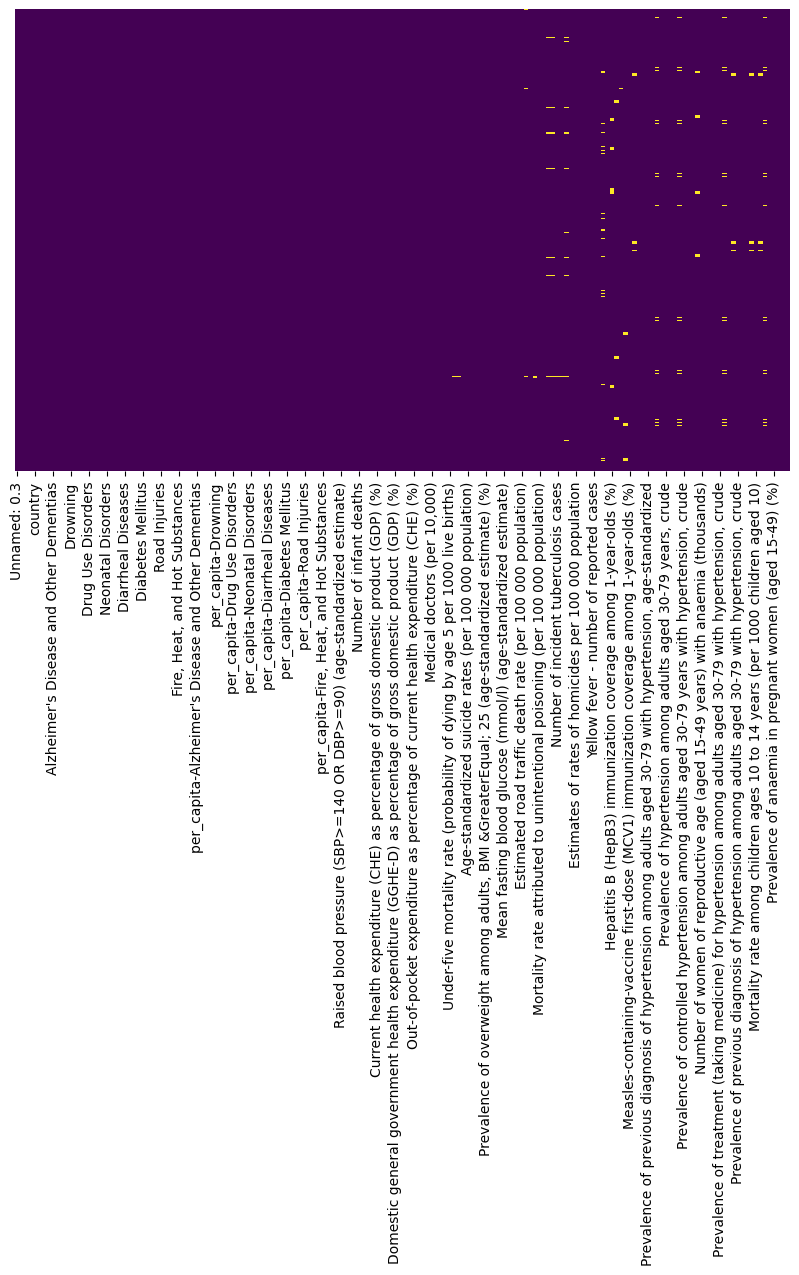

In [285]:
check_nan(data)

In [284]:
data.drop(data[data["Out-of-pocket expenditure (OOP) per capita in PPP int$"].isna()==True].index, axis=0, inplace=True)

In [300]:
nan_cols=data.isna().mean() * 100

In [301]:
nan_cols[nan_cols>2]

New cases: extrapulmonary                                                                                                                              2.358190
Measles - number of reported cases                                                                                                                     4.588910
Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)                                                                                        3.186743
Women of reproductive age (15−49 years) who are married or in-union who have their need for family planning satisfied with modern methods (%), UNPD    2.549395
dtype: float64

In [289]:
group("Mean total cholesterol,  crude")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [290]:
group("Mean total cholesterol,  age-standardized")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [291]:
group("Mean HDL cholesterol, age-standardized")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [292]:
group("Mean Non-HDL cholesterol, age-standardized")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [299]:
group("Women of reproductive age (15−49 years) who are married or in-union who have their need for family planning satisfied with modern methods (%), UNPD")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Brunei        20
Cyprus        20
Iceland       20
Luxembourg    20
Name: country, dtype: int64

In [302]:
data.drop(columns=nan_cols[nan_cols>2].index,inplace=True)

In [306]:
data.shape

(3138, 168)

In [317]:
nan_cols=data.isna().mean() * 100

In [318]:
nan_cols[nan_cols>1]

Tuberculosis treatment coverage                                                                       1.721897
Tuberculosis - new and relapse cases_x                                                                1.526966
Hib (Hib3) immunization coverage among 1-year-olds (%)                                                1.949318
Population with primary reliance on polluting fuels and technologies for cooking (in millions)        1.689409
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)    1.689409
Population with primary reliance on clean fuels and technologies for cooking (in millions)            1.689409
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)        1.689409
dtype: float64

In [311]:
group("Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Bulgaria    20
Lebanon     20
Libya       12
Name: country, dtype: int64

In [312]:
group("Hib (Hib3) immunization coverage among 1-year-olds (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


China       20
Russia      20
Thailand    20
Name: country, dtype: int64

In [313]:
group("Hospital beds (per 10 000 population)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Papua New Guinea    20
Tonga               20
Vanuatu             20
Name: country, dtype: int64

In [314]:
data.drop(data[data["Hospital beds (per 10 000 population)"].isna()==True].index, axis=0, inplace=True)

In [319]:
data.drop(columns=nan_cols[nan_cols>1].index,inplace=True)

'N nan cols: 1'

Number of deaths due to tuberculosis, excluding HIV    0.162443
dtype: float64

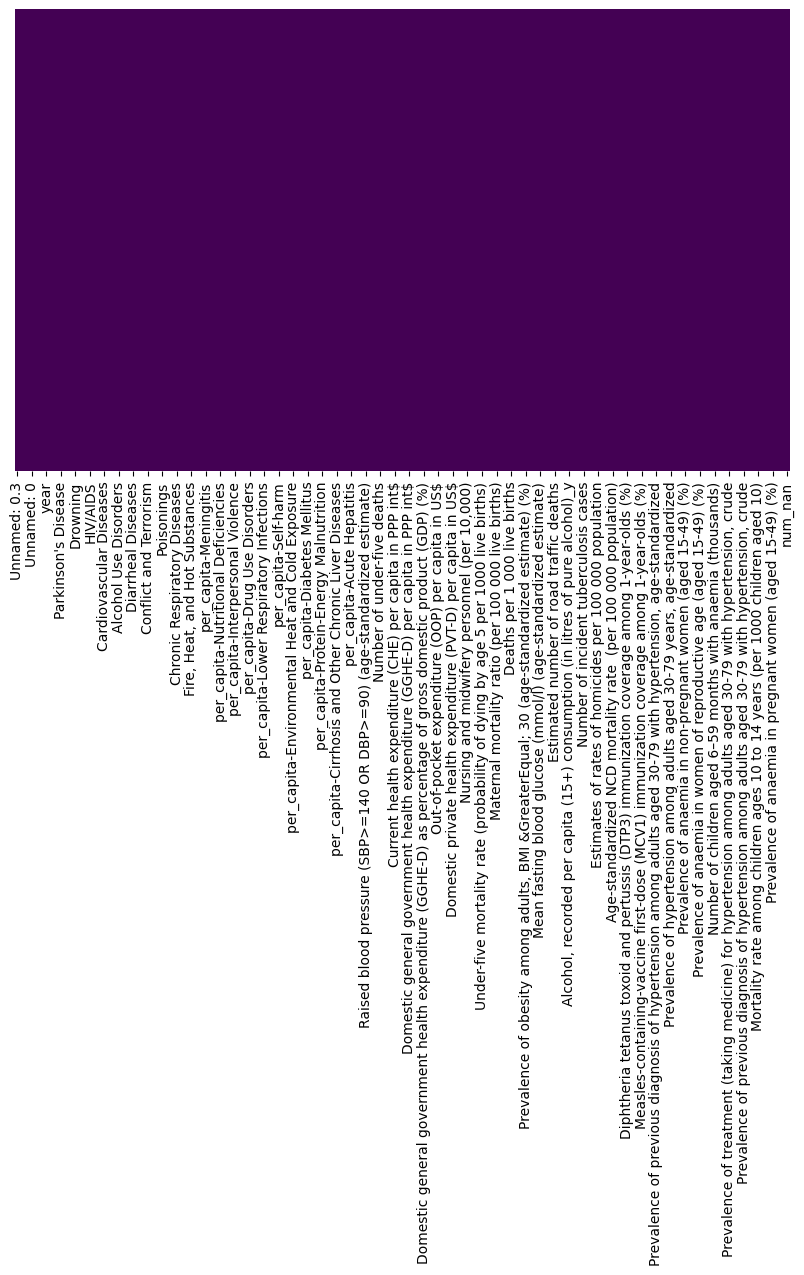

In [334]:
check_nan(data)

In [322]:
data.drop(columns =["Alcohol, total per capita (15+) consumption (in litres of pure alcohol) (SDG Indicator 3.5.2)"], inplace=True)

In [324]:
data[data["Incidence of tuberculosis (per 100 000 population per year)"].isna()==True]

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,country,country_code,year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,...,"Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude",Mean hemoglobin level of women of reproductive age (aged 15-49 years),Number of deaths among children ages 5 to 9 years,Mortality rate among children ages 10 to 14 years (per 1000 children aged 10),"Mean Non-HDL cholesterol, age-standardized",Number of non-pregnant women (aged 15-49 years) with anaemia (thousands),Prevalence of anaemia in pregnant women (aged 15-49) (%),Mean hemoglobin level of non-pregnant women (aged 15-49 years),average_age,num_nan
2760,2760,2760,2760,2760,Serbia,SRB,2000,51.0,1609.0,555.0,...,46.5,128.0,153.0,1.19473,4.2,535.0,28.4,128.0,35.67900,29
2761,2761,2761,2761,2761,Serbia,SRB,2001,49.0,1631.0,570.0,...,47.3,128.0,141.0,1.15352,4.2,522.0,28.1,128.0,37.12325,30
2762,2762,2762,2762,2762,Serbia,SRB,2002,47.0,1660.0,594.0,...,48.1,128.0,129.0,1.10200,4.2,511.0,27.9,129.0,37.12325,29
2763,2763,2763,2763,2763,Serbia,SRB,2003,46.0,1713.0,628.0,...,48.8,128.0,118.0,1.04654,4.1,501.0,27.6,129.0,37.12325,27
2764,2764,2764,2764,2764,Serbia,SRB,2004,45.0,1771.0,663.0,...,49.6,128.0,107.0,0.99451,4.1,492.0,27.3,129.0,37.12325,25


In [325]:
group("Incidence of tuberculosis (per 100 000 population per year)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [327]:
group("Polio (Pol3) immunization coverage among 1-year-olds (%)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [328]:
group("Deaths due to tuberculosis among HIV-negative people (per 100 000 population)")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [330]:
group("Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)_x")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [333]:
group("Number of incident tuberculosis cases")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [335]:
group("Number of deaths due to tuberculosis, excluding HIV")

C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data.groupby(by="country").mean()[column]
C:\Users\pabli\AppData\Local\Temp\ipykernel_15956\639891338.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][i] = df1[data["country"][i]]


Series([], Name: country, dtype: int64)

In [338]:
data.shape

(3078, 160)

In [339]:
data.columns[:4]

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], dtype='object')

In [340]:
data.drop(columns = ['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'],inplace = True)

In [341]:
data.to_csv(r'C:\Users\pabli\Desktop\Health-Database\data\clean_full_data.csv')

In [397]:
data.shape

(2888, 144)